In [34]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import src.modules as modules
import src.data_handling as dh
import scipy

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_pickle("/data/severs/clean_cancer_old.pkl")

In [4]:
Y = df.ESR1

In [5]:
X = df.drop("ESR1", axis=1)

In [6]:
X.head()plt.axhline(y=0.5, color='r', linestyle='-')

,FO538757.2,AP006222.2,RP11-206L10.9,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,...,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.4,AL354822.1,AC240274.1
Cell,,,,,,,,,,,,,,,,,,,,,
sc5rJUQ024_AAACCTGGTCTCCACT,-0.343108,-0.081219,-0.159213,-0.123929,-0.033997,0.061602,-0.290072,-0.098881,-0.095736,-0.005238,...,-3.776311,-1.423264,-1.318146,-0.477605,0.211917,-1.242434,-1.279868,-0.047263,-0.094151,0.027916
sc5rJUQ024_AAACGGGTCTCGTATT,-0.308522,-0.048712,-0.144592,-0.116811,-0.023424,0.119259,-0.258337,-0.089769,-0.097750,0.052328,...,0.303585,0.213102,0.374316,-3.442380,0.575263,-1.190086,0.776465,-0.029479,-0.078131,0.093447
sc5rJUQ024_AAAGCAAAGTGCGTGA,-0.309317,-0.053282,-0.144680,-0.116397,-0.024488,0.107756,-0.259811,-0.089825,-0.098724,0.045888,...,-0.990821,-1.011876,-0.898612,-3.438422,-2.650741,-1.191080,-0.858349,-0.032684,-0.078794,0.084099
sc5rJUQ024_AACGTTGGTTCAGCGC,-0.305403,-0.047272,-0.143177,-0.115943,-0.022791,0.120488,6.643475,-0.088888,-0.098330,0.055523,...,-0.529361,0.077009,-3.568859,-3.434878,-2.647959,-1.185283,-3.458560,-0.028966,-0.076801,0.096297
sc5rJUQ024_AACTCAGAGCCAGGAT,-0.295972,-0.040686,-0.139042,-0.113658,-0.020397,0.130144,-0.247556,-0.086311,-0.099487,0.068171,...,-3.684442,-3.559101,-3.551395,-3.415309,-2.630391,-1.170883,-0.402687,-0.025783,-0.072609,0.109493


In [7]:
train_ind_all = pd.read_csv("/data/severs/trainind_patient_strat.csv")["Resample1"].values -1

In [24]:
X_train = X.iloc[train_ind_all]
Y_train = Y[train_ind_all]

In [25]:
X_test = X[~df.index.isin(df.index[train_ind_all])]
Y_test = Y[~df.index.isin(df.index[train_ind_all])]

In [26]:
params = {
        'eta' : 0.05, 
        'max_depth' : 6,
        'n_estimators':200,
        'subsample' : 0.8,
        'colsample_bytree' : 0.8,
        'eval_metric' :  'rmse',
        'n_jobs' : 40
}

In [27]:
model_all =  xgb.XGBRegressor(**params)

In [28]:
np.random.seed(2)
model_all.fit(X_train, Y_train, verbose=10)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.05, eval_metric='rmse', gamma=0, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=40, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [32]:
r_model = xgb.Booster()
r_model.load_model('/data/severs/xgb_all.model')

In [53]:
X.head()

,FO538757.2,AP006222.2,RP11-206L10.9,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,...,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.4,AL354822.1,AC240274.1
Cell,,,,,,,,,,,,,,,,,,,,,
sc5rJUQ024_AAACCTGGTCTCCACT,-0.343108,-0.081219,-0.159213,-0.123929,-0.033997,0.061602,-0.290072,-0.098881,-0.095736,-0.005238,...,-3.776311,-1.423264,-1.318146,-0.477605,0.211917,-1.242434,-1.279868,-0.047263,-0.094151,0.027916
sc5rJUQ024_AAACGGGTCTCGTATT,-0.308522,-0.048712,-0.144592,-0.116811,-0.023424,0.119259,-0.258337,-0.089769,-0.097750,0.052328,...,0.303585,0.213102,0.374316,-3.442380,0.575263,-1.190086,0.776465,-0.029479,-0.078131,0.093447
sc5rJUQ024_AAAGCAAAGTGCGTGA,-0.309317,-0.053282,-0.144680,-0.116397,-0.024488,0.107756,-0.259811,-0.089825,-0.098724,0.045888,...,-0.990821,-1.011876,-0.898612,-3.438422,-2.650741,-1.191080,-0.858349,-0.032684,-0.078794,0.084099
sc5rJUQ024_AACGTTGGTTCAGCGC,-0.305403,-0.047272,-0.143177,-0.115943,-0.022791,0.120488,6.643475,-0.088888,-0.098330,0.055523,...,-0.529361,0.077009,-3.568859,-3.434878,-2.647959,-1.185283,-3.458560,-0.028966,-0.076801,0.096297
sc5rJUQ024_AACTCAGAGCCAGGAT,-0.295972,-0.040686,-0.139042,-0.113658,-0.020397,0.130144,-0.247556,-0.086311,-0.099487,0.068171,...,-3.684442,-3.559101,-3.551395,-3.415309,-2.630391,-1.170883,-0.402687,-0.025783,-0.072609,0.109493


# All data: shapley

In [33]:
explainer = shap.Explainer(r_model)
shap_values = explainer(X_train)

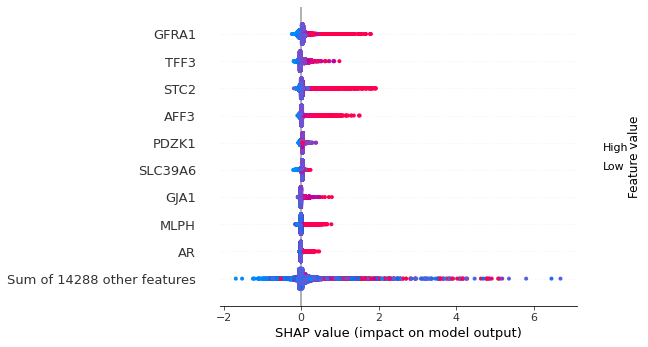

In [34]:
shap.plots.beeswarm(shap_values)

In [70]:
y_pred = r_model.predict(xgb.DMatrix(X_test))

# Differentially expressed data: shapley
14000 genes

In [8]:
train_ind_diff = pd.read_csv("/data/severs/trainind_patient_strat_diffexp.csv")["Resample1"].values -1

In [25]:
X_train_d = X.loc[abs(Y)>0.5].iloc[train_ind_diff]

In [26]:
Y_train_d = Y[abs(Y)>0.5][train_ind_diff]

In [27]:
X_test_d = X.loc[abs(Y)>0.5].iloc[~Y[abs(Y)>0.5].index.isin(Y[abs(Y)>0.5].index[train_ind_diff])]

In [38]:
Y_test_d = Y[abs(Y)>0.5][~Y[abs(Y)>0.5].index.isin(Y[abs(Y)>0.5].index[train_ind_diff])]

In [30]:
model_diff = xgb.Booster()
model_diff.load_model('/data/severs/xgb_diffexp.model')

In [39]:
y_hat = model_diff.predict(xgb.DMatrix(X_test_d))

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.


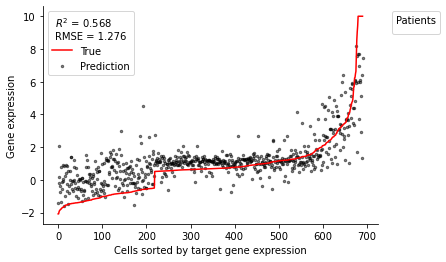

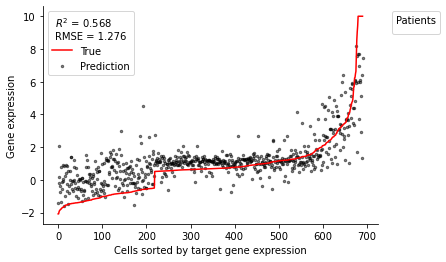

In [42]:
modules.plot_prediction(Y_test_d, y_hat)

In [15]:
tree_explainer = shap.TreeExplainer(model_diff)
shap_values = tree_explainer(X_train_d)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


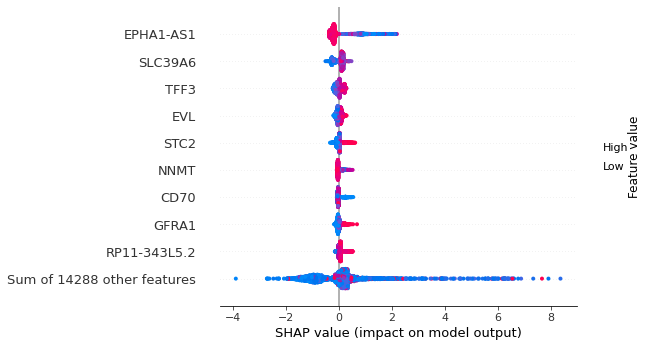

In [16]:
shap.plots.beeswarm(shap_values)

In [78]:
abs(shap_values.values).mean(axis=0).shape

(14297,)

In [80]:
X_train

,FO538757.2,AP006222.2,RP11-206L10.9,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,...,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.4,AL354822.1,AC240274.1
Cell,,,,,,,,,,,,,,,,,,,,,
sc5rJUQ024_AAACCTGGTCTCCACT,-0.343108,-0.081219,-0.159213,-0.123929,-0.033997,0.061602,-0.290072,-0.098881,-0.095736,-0.005238,...,-3.776311,-1.423264,-1.318146,-0.477605,0.211917,-1.242434,-1.279868,-0.047263,-0.094151,0.027916
sc5rJUQ024_AAACGGGTCTCGTATT,-0.308522,-0.048712,-0.144592,-0.116811,-0.023424,0.119259,-0.258337,-0.089769,-0.097750,0.052328,...,0.303585,0.213102,0.374316,-3.442380,0.575263,-1.190086,0.776465,-0.029479,-0.078131,0.093447
sc5rJUQ024_AAAGCAAAGTGCGTGA,-0.309317,-0.053282,-0.144680,-0.116397,-0.024488,0.107756,-0.259811,-0.089825,-0.098724,0.045888,...,-0.990821,-1.011876,-0.898612,-3.438422,-2.650741,-1.191080,-0.858349,-0.032684,-0.078794,0.084099
sc5rJUQ024_AACGTTGGTTCAGCGC,-0.305403,-0.047272,-0.143177,-0.115943,-0.022791,0.120488,6.643475,-0.088888,-0.098330,0.055523,...,-0.529361,0.077009,-3.568859,-3.434878,-2.647959,-1.185283,-3.458560,-0.028966,-0.076801,0.096297
sc5rJUQ024_AACTCAGAGCCAGGAT,-0.295972,-0.040686,-0.139042,-0.113658,-0.020397,0.130144,-0.247556,-0.086311,-0.099487,0.068171,...,-3.684442,-3.559101,-3.551395,-3.415309,-2.630391,-1.170883,-0.402687,-0.025783,-0.072609,0.109493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sc5rJUQ064_TTTGGTTTCTCAAACG,-0.460078,-0.171819,-0.229624,-0.125968,-0.046948,-0.075594,-0.439141,-0.097347,-0.121712,-0.146458,...,0.497561,0.830579,0.230791,-0.525888,0.724142,0.958154,0.197164,-0.055243,-0.128814,-0.179733
sc5rJUQ064_TTTGGTTTCTCTTATG,-0.607701,-0.207720,-0.276907,-0.169641,-0.106474,-0.030809,-0.603591,-0.103969,-0.148205,-0.192716,...,-0.446562,-0.425869,-0.166023,-0.398789,-0.283958,-0.303860,-0.275809,-0.102640,-0.132058,-0.340590
sc5rJUQ064_TTTGGTTTCTGCCCTA,1.625046,-0.194686,-0.259744,-0.153497,-0.083841,-0.047488,-0.542937,-0.101457,-0.138706,-0.174681,...,0.312062,0.305445,-0.016974,-0.149153,-0.448625,-0.568233,-0.142553,-0.083901,-0.130834,-0.281122


In [ ]:
shap_interactions = shap.TreeExplainer(model_diff).shap_interaction_values(X_test_d.iloc[:1000:])

# Finding high correletion, low Shap value 

In [14]:
n_col = X_train_d.shape[1]

In [15]:
correlation = np.empty(n_col)
p_value = np.copy(correlation)

In [19]:
target_col = X_train_d["EPHA1-AS1"]
for i in range(n_col):
    correlation[i] = target_col.corr(X_train_d[X_train_d.columns[i]])
    t = correlation[i] * np.sqrt(X_train_d.shape[0]-2) / np.sqrt(1 - correlation[i]**2) # t-test
    p_value[i] = scipy.stats.t.sf(abs(t), X_train_d.shape[0]-2)*2
    if p_value[i] == float("nan"):
        print(correlation[i])
        print(t)
        print(non_nan_count[i])

divide by zero encountered in double_scalars


In [20]:
p_value[np.where(p_value>1)[0]] = 1.0

corr_EPHA1 = pd.DataFrame()
corr_EPHA1["correlation"] = correlation
corr_EPHA1["p-value"] = p_value
corr_EPHA1.index = X_train_d.columns

In [24]:
pcorr_EPHA1.sort_values("correlation")

,correlation,p-value
CHMP4B,-0.057369,2.532642e-03
TMEM99,-0.056467,2.960265e-03
AUTS2,-0.052310,5.909685e-03
AP1M2,-0.051578,6.643753e-03
COX6C,-0.050860,7.442877e-03
...,...,...
CD1D,0.212417,1.315885e-29
TRGV10,0.233468,1.397268e-35
CCL20,0.270605,1.176933e-47
TNFSF8,0.339414,1.363723e-75


In [ ]:
X_train_d_corr = X_train_d.corr()